In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
img1 = cv2.imread('DATA/dog_backpack.png') 
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('DATA/watermark_no_copy.png') 
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

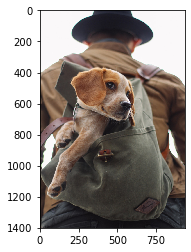

In [4]:
plt.imshow(img1)

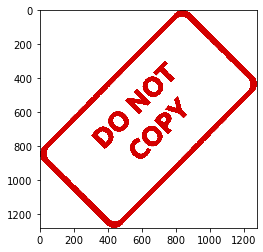

In [5]:
plt.imshow(img2)

In [6]:
img2 = cv2.resize(img2,(600,600))

In [8]:
img1.shape

(1401, 934, 3)

In [9]:
y_offset = 1401 - 600
x_offset = 934 - 600

In [10]:
rows,cols,channels = img2.shape

In [12]:
roi = img1[y_offset:1401,x_offset:934]

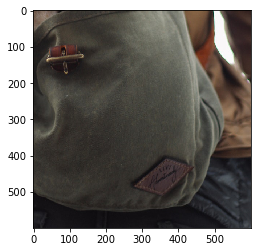

In [13]:
plt.imshow(roi)

In [14]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

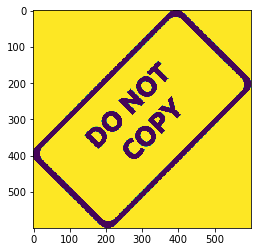

In [15]:
plt.imshow(img2gray)

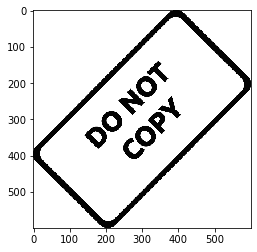

In [17]:
plt.imshow(img2gray,cmap='gray')

In [18]:
mask_inv = cv2.bitwise_not(img2gray)

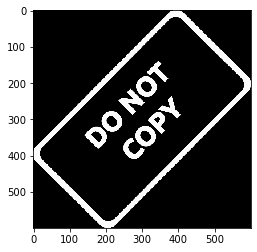

In [20]:
plt.imshow(mask_inv,cmap='gray')

In [21]:
mask_inv.shape

(600, 600)

In [22]:
white_background = np.full(img2.shape,255,dtype = np.uint8)

In [26]:
white_background.shape

(600, 600, 3)

In [30]:
bk = cv2.bitwise_or(white_background,white_background,mask = mask_inv)

In [31]:
bk.shape

(600, 600, 3)

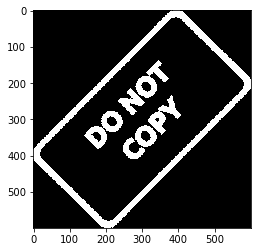

In [32]:
plt.imshow(bk)

In [33]:
fg = cv2.bitwise_or(img2,img2,mask = mask_inv)

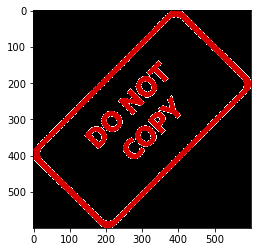

In [34]:
plt.imshow(fg)

In [35]:
final_roi = cv2.bitwise_or(roi,fg)

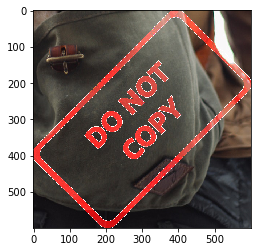

In [36]:
plt.imshow(final_roi)

In [37]:
large_img = img1
small_img = img2

In [39]:
large_img[y_offset:y_offset + small_img.shape[0],x_offset: x_offset + small_img.shape[1]] = final_roi

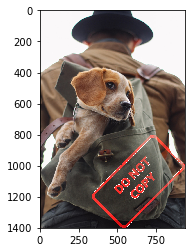

In [40]:
plt.imshow(large_img)